In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np

In [2]:
'''
TODO:
Calculate the monthly load curve the PGE region
Run the SCE simulation of that load
Compare percent error
'''

'\nTODO:\nCalculate the monthly load curve the PGE region\nRun the SCE simulation of that load\nCompare percent error\n'

In [3]:
daysInMonth = [31,28,31,30,31,30,31,31,30,31,30,31]
df1 = pd.read_csv("PGE MedCom.csv")

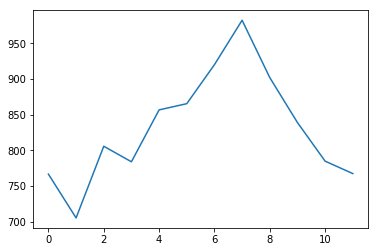

In [4]:
data = []
for e in df1:
    if ":" in e:
        data.append(df1[e].as_matrix())

load = []
for i in range(len(data[0])):
    for j in range(len(data)):
        load.append(data[j][i])
monthly = []
cur = 0
for e in daysInMonth:
    monthly.append(np.sum(load[cur:cur + e *48]))
    cur += e*48

plt.plot(monthly)

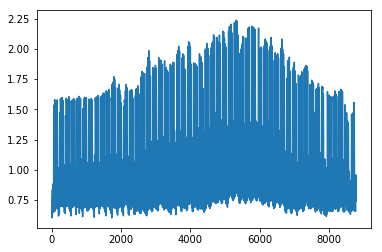

In [5]:
l2 = []
p = 1
while(p+1 < len(load)):
    l2.append(load[p] + load[p+1])
    p += 2
plt.plot(l2)

In [6]:
df2 = pd.read_csv("MedIndPros.csv")

In [7]:
TOU = [[] for i in range(12)]
for e in df2:
    if "Unnamed" in e:
        continue
    month = int(e.split("/")[0])-1
    TOU[month].extend(df2[e].as_matrix())


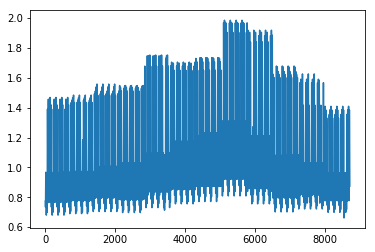

In [8]:
gen = []
for i in range(12):
    l = monthly[i]
    for x in TOU[i]:
        gen.append(l * x)

gen = gen[48:len(gen)]
plt.plot(gen)


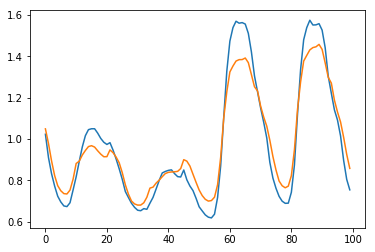

In [11]:
plt.plot(l2[500:600])
plt.plot(gen[500:600])

In [10]:
errs = []
for i in range(0,len(gen)):
    err = (l2[i] - gen[i] )/ l2[i]
    if(err < 0): err = -1 * err
    errs.append(err)
print("MEAN = " + str(np.mean(errs)))
print("STD = " + str(np.std(errs)))

MEAN = 0.1059393578992557
STD = 0.09068017733468323


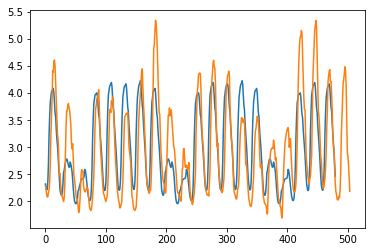

In [33]:
dfBGE = pd.read_csv("BGE2.csv")
data3 = []
for e in dfBGE:
    if ":" in e:
        data3.append(dfBGE[e].as_matrix())

loadBGE = []
for i in range(len(data3[0])):
    for j in range(len(data3)):
        loadBGE.append(data3[j][i])
        
monthlyBGE = []
cur = 0
for e in daysInMonth:
    monthlyBGE.append(np.sum(loadBGE[cur:cur + e *24]))
    cur += e*24
    
gen2 = []
for i in range(12):
    l = monthlyBGE[i]
    for x in TOU[i]:
        gen2.append(l * x)

plt.plot(gen2[24:24*7 *3])
plt.plot(loadBGE[0:24*7*3])

In [39]:
errs = []
for i in range(0,min(len(loadBGE),len(gen2))):
    err = (loadBGE[i] - gen2[i] )/ loadBGE[i]
    if(err > 0): 
        if(err < 0): err = -1 * err
        errs.append(err)
print("MEAN = " + str(np.mean(errs)))
print("STD = " + str(np.std(errs)))

MEAN = 0.14829951946519268
STD = 0.11755979822552488
